# Example expected syntax of the R client
Not expected to be fully functional yet

In [31]:
library(devtools)
options(unzip = 'internal'); install_github("Open-EO/openeo-r-backend", ref="develop") # Currently takes a while
install_github("Open-EO/openeo-r-client", ref="develop")
library(openeo)

from URL https://api.github.com/repos/Open-EO/openeo-r-backend/zipball/develop
Installing openEO.R.Backend
'/usr/lib64/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/RtmpHlReOr/devtools185b4a6ac91b/Open-EO-openeo-r-backend-c51d033'  \
  --library='/home/dainius/R/x86_64-suse-linux-gnu-library/3.3'  \
  --install-tests 

from URL https://api.github.com/repos/Open-EO/openeo-r-client/zipball/develop
Installing openeo
'/usr/lib64/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/RtmpHlReOr/devtools185b3ba8b660/Open-EO-openeo-r-client-0000438'  \
  --library='/home/dainius/R/x86_64-suse-linux-gnu-library/3.3'  \
  --install-tests 

Reloading installed openeo


(Potentially there should be an ability to explore available/connected backends)

## Connect to a backend

In [32]:
conn = connect("http://localhost:8000/api", "test", "test", rbackend=TRUE)

Registered 'http://localhost:8000/api' as host
Login successful.

## Listing backend capabilities:
Get a list of functions that the backend natively supports; names and descriptions (list/named vector)

In [33]:
listProcesses(conn)

process_id,description
filter_daterange,filters a data set with a temporal dimension based on a stated start and end date
find_min,calculates the minimum value per pixel of a single valued band collection
calculate_ndvi,Calculates the ndvi per pixel and scene in a given collection


Same for listing collections on the backend

In [34]:
listCollections(conn)

product_id,description,source
landsat7_ndvi,Landsat7 NDVI calculation,Marius Appel
sentinel2_subset,Sentinel 2 raster time series for a small spatial subset,ESA / Marius Appel


Get in-depth information about a process or collection

In [35]:
describeProcess(conn, "filter_daterange")

[[1]]
[[1]]$process_id
[1] "filter_daterange"

[[1]]$description
[1] "filters a data set with a temporal dimension based on a stated start and end date"

[[1]]$args
[[1]]$args$imagery
[[1]]$args$imagery$description
[1] "the temporal dataset/collection"


[[1]]$args$from
[[1]]$args$from$description
[1] "start date/timestamp for the query interval"


[[1]]$args$to
[[1]]$args$to$description
[1] "end date/timestamp for the query interval"

In [36]:
describeCollection(conn, c("sentinel2_subset", "landsat7_ndvi"))

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[2]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

[[1]]
[[1]]$product_id
[1] "sentinel2_subset"

[[1]]$description
[1] "Sentinel 2 raster time series for a small spatial subset"

[[1]]$source
[1] "ESA / Marius Appel"

[[1]]$extent
class       : Extent 
xmin        : 699960 
xmax        : 702960 
ymin        : 7897000 
ymax        : 7900000 

[[1]]$time
[[1]]$time$from
[1] "2016-12-12 08:23:32 UTC"

[[1]]$time$to
[1] "2017-08-29 08:16:01 UTC"


[[1]]$bands
[[1]]$bands[[1]]
[[1]]$bands[[1]]$band_id
[1] "1"

[[1]]$bands[[1]]$name
NULL

[[1]]$bands[[1]]$wavelength_nm
[1] "443"

[[1]]$bands[[1]]$res
[[1]]$bands[[1]]$res$x
[1] 60

[[1]]$bands[[1]]$res$y
[1] 60


[[1]]$bands[[1]]$scale
[1] 1

[[1]]$bands[[1]]$offset
[1] 0

[[1]]$bands[[1]]$type
[1] "uint16"

[[1]]$bands[[1]]$unit
NULL

[[1]]$bands[[1]]$nodata
[1] 0


[[1]]$bands[[2]]
[[1]]$bands[[2]]$band_id
[1] "2"

[[1]]$bands[[2]]$name
[1] "blue"

[[1]]$bands[[2]]$wavelength_nm
[1] "490"

[[1]]$bands[[2]]$res
[[1]]$bands[[2]]$res$x
[1] 10

[[1]]$bands[[2]]$res$y
[1] 10


[[1]]$bands[[2]]$

Listing existing user jobs

In [37]:
listJobs(conn)

[[1]]
[[1]]$job_id
[1] "FtJ7RldsrH049Of"

[[1]]$user_id
[1] 2.68532e+11

[[1]]$status
[1] "submitted"

[[1]]$process_graph
[[1]]$process_graph$process_id
[1] "calculate_ndvi"

[[1]]$process_graph$args
[[1]]$process_graph$args[[1]]
[[1]]$process_graph$args[[1]]$imagery
[[1]]$process_graph$args[[1]]$imagery$process_id
[1] "filter_daterange"

[[1]]$process_graph$args[[1]]$imagery$args
[[1]]$process_graph$args[[1]]$imagery$args[[1]]
[[1]]$process_graph$args[[1]]$imagery$args[[1]]$imagery
[[1]]$process_graph$args[[1]]$imagery$args[[1]]$imagery$product_id
[1] "sentinel2_subset"



[[1]]$process_graph$args[[1]]$imagery$args[[2]]
[[1]]$process_graph$args[[1]]$imagery$args[[2]]$from
[1] "2017-04-01"


[[1]]$process_graph$args[[1]]$imagery$args[[3]]
[[1]]$process_graph$args[[1]]$imagery$args[[3]]$to
[1] "2017-05-01"





[[1]]$process_graph$args[[2]]
[[1]]$process_graph$args[[2]]$nir
[1] 4


[[1]]$process_graph$args[[3]]
[[1]]$process_graph$args[[3]]$red
[1] 8




[[1]]$submitted
[1] "2018-02-20 13:51:41"

[[1]]$last_update
[1] "2018-02-20 13:51:41"

[[1]]$consumed_credits
[1] 0


[[2]]
[[2]]$job_id
[1] "xu8sXM6HSzxZYZW"

[[2]]$user_id
[1] 2.68532e+11

[[2]]$status
[1] "submitted"

[[2]]$process_graph
[[2]]$process_graph$process_id
[1] "calculate_ndvi"

[[2]]$process_graph$args
[[2]]$process_graph$args[[1]]
[[2]]$process_graph$args[[1]]$imagery
[[2]]$process_graph$args[[1]]$imagery$process_id
[1] "filter_daterange"

[[2]]$process_graph$args[[1]]$imagery$args
[[2]]$process_graph$args[[1]]$imagery$args[[1]]
[[2]]$process_graph$args[[1]]$imagery$args[[1]]$imagery
[[2]]$process_graph$args[[1]]$imagery$args[[1]]$imagery$product_id
[1] "sentinel2_subset"



[[2]]$process_graph$args[[1]]$imagery$args[[2]]
[[2]]$process_graph$args[[1]]$imagery$args[[2]]$from
[1] "2017-04-01"


[[2]]$process_graph$args[[1]]$imagery$args[[3]]
[[2]]$process_graph$args[[1]]$imagery$args[[3]]$to
[1] "2017-05-01"





[[2]]$process_graph$args[[2]]
[[2]]$process_graph$args[[2]]$nir
[1] 4


[[2]]$process_graph$args[[3]]
[[2]]$process_graph$args[[3]]$red
[1] 8




[[2]]$submitted
[1] "2018-02-20 13:59:30"

[[2]]$last_update
[1] "2018-02-20 13:59:30"

[[2]]$consumed_credits
[1] 0


[[3]]
[[3]]$job_id
[1] "fUjoEqb69VUu7kU"

[[3]]$user_id
[1] 2.68532e+11

[[3]]$status
[1] "submitted"

[[3]]$process_graph
[[3]]$process_graph$process_id
[1] "calculate_ndvi"

[[3]]$process_graph$args
[[3]]$process_graph$args[[1]]
[[3]]$process_graph$args[[1]]$imagery
[[3]]$process_graph$args[[1]]$imagery$process_id
[1] "filter_daterange"

[[3]]$process_graph$args[[1]]$imagery$args
[[3]]$process_graph$args[[1]]$imagery$args[[1]]
[[3]]$process_graph$args[[1]]$imagery$args[[1]]$imagery
[[3]]$process_graph$args[[1]]$imagery$args[[1]]$imagery$product_id
[1] "sentinel2_subset"



[[3]]$process_graph$args[[1]]$imagery$args[[2]]
[[3]]$process_graph$args[[1]]$imagery$args[[2]]$from
[1] "2017-04-01"


[[3]]$process_graph$args[[1]]$imagery$args[[3]]
[[3]]$process_graph$args[[1]]$imagery$args[[3]]$to
[1] "2017-05-01"





[[3]]$process_graph$args[[2]]
[[3]]$process_graph$args[[2]]$nir
[1] 4


[[3]]$process_graph$args[[3]]
[[3]]$process_graph$args[[3]]$red
[1] 8




[[3]]$submitted
[1] "2018-02-20 14:02:46"

[[3]]$last_update
[1] "2018-02-20 14:02:46"

[[3]]$consumed_credits
[1] 0

Listing which UDF capabilities/packages are supported

In [38]:
listUDFCapabilities(conn)

ERROR: Error in eval(expr, envir, enclos): could not find function "listUDFCapabilities"


## Simple task: calculating NDVI using a linked list of processes
Assumes NDVI function takes band names as parameters

In [39]:
Task = collection("sentinel2_subset") %>% process("filter_daterange", from="2017-04-01", to="2017-05-01") %>%
    process("calculate_ndvi", red=4, nir=8)
str(Task)
taskToJSON(Task)

List of 2
 $ process_id: chr "calculate_ndvi"
 $ args      :List of 3
  ..$ collections:List of 2
  .. ..$ process_id: chr "filter_daterange"
  .. ..$ args      :List of 3
  .. .. ..$ collections:List of 1
  .. .. .. ..$ collection_id: chr "sentinel2_subset"
  .. .. .. ..- attr(*, "type")= chr "collection"
  .. .. ..$ from       : chr "2017-04-01"
  .. .. ..$ to         : chr "2017-05-01"
  .. ..- attr(*, "type")= chr "process"
  ..$ red        : num 4
  ..$ nir        : num 8
 - attr(*, "type")= chr "process"


{
  "process_id": "calculate_ndvi",
  "args": {
    "collections": {
      "process_id": "filter_daterange",
      "args": {
        "collections": {
          "collection_id": "sentinel2_subset"
        },
        "from": "2017-04-01",
        "to": "2017-05-01"
      }
    },
    "red": 4,
    "nir": 8
  }
} 

Due to API transition, however, currently some extra parameters are needed:

In [40]:
Task = collection("sentinel2_subset", id_name="product_id") %>%
    process("filter_daterange", prior.name="imagery", from="2017-04-01", to="2017-05-01") %>%
    process("calculate_ndvi", prior.name="imagery", red=4, nir=8)
str(Task)
taskToJSON(Task)

List of 2
 $ process_id: chr "calculate_ndvi"
 $ args      :List of 3
  ..$ imagery:List of 2
  .. ..$ process_id: chr "filter_daterange"
  .. ..$ args      :List of 3
  .. .. ..$ imagery:List of 1
  .. .. .. ..$ product_id: chr "sentinel2_subset"
  .. .. .. ..- attr(*, "type")= chr "collection"
  .. .. ..$ from   : chr "2017-04-01"
  .. .. ..$ to     : chr "2017-05-01"
  .. ..- attr(*, "type")= chr "process"
  ..$ red    : num 4
  ..$ nir    : num 8
 - attr(*, "type")= chr "process"


{
  "process_id": "calculate_ndvi",
  "args": {
    "imagery": {
      "process_id": "filter_daterange",
      "args": {
        "imagery": {
          "product_id": "sentinel2_subset"
        },
        "from": "2017-04-01",
        "to": "2017-05-01"
      }
    },
    "red": 4,
    "nir": 8
  }
} 

## Advanced task: calculating NDVI using processes that have other processes as arguments 
Assumes NDVI function takes process graphs

In [26]:
AOICollection = collection("S2_L2A_T32TPS_20M") %>% process("filter_daterange", start="2016", end="2018")
RedSubset = AOICollection %>% process("filter_band", band="red")
NIRSubset = AOICollection %>% process("filter_band", band="nir")
Task = AOICollection %>% process("NDVI", red=RedSubset, nir=NIRSubset)

str(Task)
taskToJSON(Task)

List of 2
 $ process_id: chr "NDVI"
 $ args      :List of 3
  ..$ collections:List of 2
  .. ..$ process_id: chr "filter_daterange"
  .. ..$ args      :List of 3
  .. .. ..$ collections:List of 1
  .. .. .. ..$ collection_id: chr "S2_L2A_T32TPS_20M"
  .. .. .. ..- attr(*, "type")= chr "collection"
  .. .. ..$ start      : chr "2016"
  .. .. ..$ end        : chr "2018"
  .. ..- attr(*, "type")= chr "process"
  ..$ red        :List of 2
  .. ..$ process_id: chr "filter_band"
  .. ..$ args      :List of 2
  .. .. ..$ collections:List of 2
  .. .. .. ..$ process_id: chr "filter_daterange"
  .. .. .. ..$ args      :List of 3
  .. .. .. .. ..$ collections:List of 1
  .. .. .. .. .. ..$ collection_id: chr "S2_L2A_T32TPS_20M"
  .. .. .. .. .. ..- attr(*, "type")= chr "collection"
  .. .. .. .. ..$ start      : chr "2016"
  .. .. .. .. ..$ end        : chr "2018"
  .. .. .. ..- attr(*, "type")= chr "process"
  .. .. ..$ band       : chr "red"
  .. ..- attr(*, "type")= chr "process"
  ..$ nir   

{
  "process_id": "NDVI",
  "args": {
    "collections": {
      "process_id": "filter_daterange",
      "args": {
        "collections": {
          "collection_id": "S2_L2A_T32TPS_20M"
        },
        "start": "2016",
        "end": "2018"
      }
    },
    "red": {
      "process_id": "filter_band",
      "args": {
        "collections": {
          "process_id": "filter_daterange",
          "args": {
            "collections": {
              "collection_id": "S2_L2A_T32TPS_20M"
            },
            "start": "2016",
            "end": "2018"
          }
        },
        "band": "red"
      }
    },
    "nir": {
      "process_id": "filter_band",
      "args": {
        "collections": {
          "process_id": "filter_daterange",
          "args": {
            "collections": {
              "collection_id": "S2_L2A_T32TPS_20M"
            },
            "start": "2016",
            "end": "2018"
          }
        },
        "band": "nir"
      }
    }
  }
} 

## Three ways of processing data in OpenEO:
### Synchronous
Run right away and give data as an object (Raster?); 'format' optional, should default to native that is then read into a Raster* object

In [41]:
Result = executeTask(conn, Task, format="GTiff")

In [44]:
writeBin(Result, "output.tif")
ResultRaster = raster("output.tif")
ResultRaster

class       : RasterLayer 
dimensions  : 300, 300, 90000  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : 699960, 702960, 7897000, 7900000  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=34 +south +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/dainius/Documents/OpenEO/openeo-r-client/examples/notebooks/output.tif 
names       : output 
values      : -0.6170109, 0.448203  (min, max)


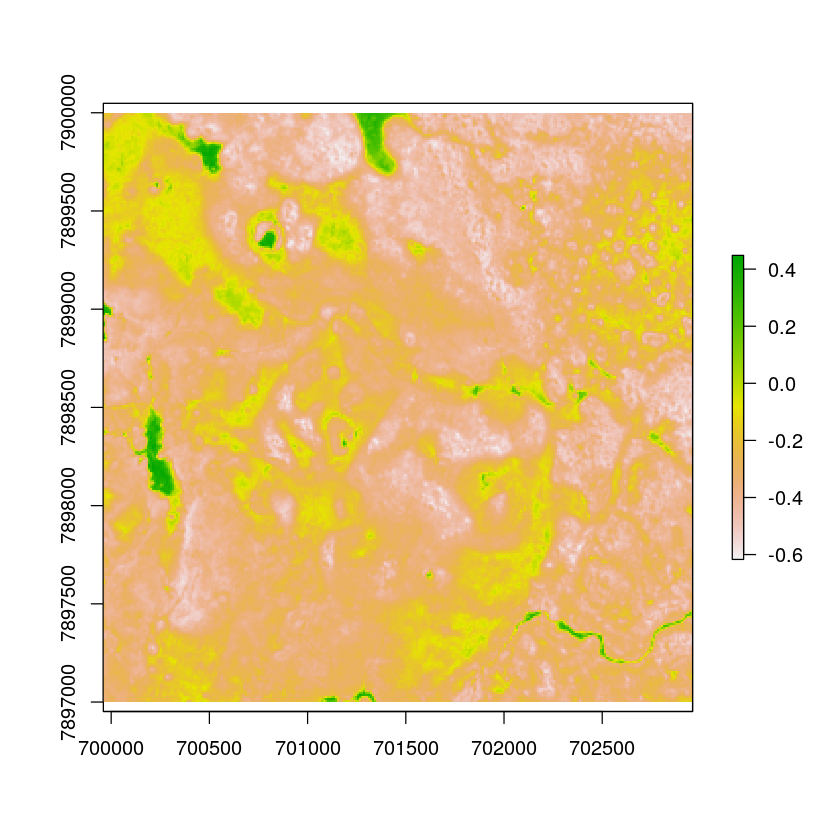

In [45]:
plot(ResultRaster)

### Lazy
Ask the server to run it when needed (on WCS, but also download etc.)

In [13]:
(JobID = queueTask(conn, Task))

NULL

### Batch
Ask the server to prepare it the USGS ESPA way, get a job ID and the URL to the output location. This is actually a lazy job followed by a download link request.

In [15]:
OutputInfo = orderResult(conn, Task)
(JobID = OutputInfo$JobID)
OutputInfo

NULL

NULL

## Functions that can be performed with a JobID
Lazy (and batch) only

In [17]:
followJob(conn, JobID) # cat --follow style updates about the job
(JobInfo = queryJob(conn, JobID)) # Get current information on a job
(Result = downloadJob(conn, JobID, "GeoTIFF", "composite.tif")) # Get the result as with the synchronous case, save to file
(WCSURL = getWCSLink(conn, JobID)) # Get a URL to the WCS to visualise/download data
cancelJob(conn, JobID) # Ask to delete a job, the backend eventually removes it

NULL

NULL

NULL

NULL

ERROR: Error in eval(expr, envir, enclos): could not find function "getWCSLink"


## Either way have a result, should be a **Raster*** object

In [ ]:
plot(Result)
spplot(Result, 3)

## Theoretical use case 1: composite example

In [27]:
CompositeTask = collection("S2_L2A_T32TPS_20M") %>% process("date_range_filter", start="2016-01-01", end="2016-03-10") %>%
    process("bbox_filter", left=652000, right=672000, top=5161000, bottom=5181000, srs="EPSG:32632") %>%
    process("max_time")

str(CompositeTask)
taskToJSON(CompositeTask)

List of 2
 $ process_id: chr "max_time"
 $ args      :List of 1
  ..$ collections:List of 2
  .. ..$ process_id: chr "bbox_filter"
  .. ..$ args      :List of 6
  .. .. ..$ collections:List of 2
  .. .. .. ..$ process_id: chr "date_range_filter"
  .. .. .. ..$ args      :List of 3
  .. .. .. .. ..$ collections:List of 1
  .. .. .. .. .. ..$ collection_id: chr "S2_L2A_T32TPS_20M"
  .. .. .. .. .. ..- attr(*, "type")= chr "collection"
  .. .. .. .. ..$ start      : chr "2016-01-01"
  .. .. .. .. ..$ end        : chr "2016-03-10"
  .. .. .. ..- attr(*, "type")= chr "process"
  .. .. ..$ left       : num 652000
  .. .. ..$ right      : num 672000
  .. .. ..$ top        : num 5161000
  .. .. ..$ bottom     : num 5181000
  .. .. ..$ srs        : chr "EPSG:32632"
  .. ..- attr(*, "type")= chr "process"
 - attr(*, "type")= chr "process"


{
  "process_id": "max_time",
  "args": {
    "collections": {
      "process_id": "bbox_filter",
      "args": {
        "collections": {
          "process_id": "date_range_filter",
          "args": {
            "collections": {
              "collection_id": "S2_L2A_T32TPS_20M"
            },
            "start": "2016-01-01",
            "end": "2016-03-10"
          }
        },
        "left": 652000,
        "right": 672000,
        "top": 5161000,
        "bottom": 5181000,
        "srs": "EPSG:32632"
      }
    }
  }
} 

### Lazy

In [15]:
Conn = connect(host="http://saocompute.eurac.edu/openEO_WCPS_Driver", user="nobody", password="nobody")
Job = queueTask(Conn, CompositeTask)
OutPath = file.path("Downloads", "Result.netcdf")
downloadJob(Conn, Job, OutPath, "netcdf") # Processing happens here
Result = brick(OutPath)

Registered 'http://saocompute.eurac.edu/openEO_WCPS_Driver' as host


ERROR: Error in OpenEOClient$new()$connect(url = host)$login(user = user, password = password): Login failed.


### Synchronous

In [ ]:
Result = executeTask(Conn, CompositeTask)

In [ ]:
plot(Result)

## Complex use case: Land cover classification

UDF definitions: uploading a file so that it can be used as a process

In [28]:
defineUDF(conn, language="R", target="resample", type="aggregate_space", content=file.path("resample.r")) # This could be a server-defined function too
defineUDF(conn, language="R", target="temporal_cloud_filter", type="apply_time", content=file.path("temporal_cloud_filter.r")) # No such type in API yet
defineUDF(conn, language="R", target="harmonic_analysis", type="reduce_time", content=file.path("harmonic_analysis.r"))
defineUDF(conn, language="R", target="ranger_classification", type="apply_pixel", content=file.path("ranger_classification.r"))

$process_id
[1] "/udf/R/aggregate_space"

$args
$args$script
[1] "resample"


attr(,"type")
[1] "udf"

$process_id
[1] "/udf/R/apply_time"

$args
$args$script
[1] "temporal_cloud_filter"


attr(,"type")
[1] "udf"

$process_id
[1] "/udf/R/reduce_time"

$args
$args$script
[1] "harmonic_analysis"


attr(,"type")
[1] "udf"

$process_id
[1] "/udf/R/apply_pixel"

$args
$args$script
[1] "ranger_classification"


attr(,"type")
[1] "udf"

Process graphs

In [30]:
DEMCollection = collection("GLSDEM") %>%
    process("bbox_filter", left=652000, right=672000, top=5161000, bottom=5181000, srs="EPSG:32632") %>%
    process("resample", input=collection("S2_L2A_T32TPS_20M"))
    # UDF to resample to Sentinel 2 pixel size

CloudlessNDVI = collection("S2_L2A_T32TPS_20M") %>% # Graph part reused in several places
    process("bbox_filter", left=652000, right=672000, top=5161000, bottom=5181000, srs="EPSG:32632") %>%
    process("mask", mask="CM", maskvalue=5) %>% process("ndvi", red="B04", nir="B8A") %>%
    process("temporal_cloud_filter", band="B02", threshold="50")
    # Temporal cloud filter UDF: for each pixel use blue to detect outliers, replace more than 50 with NA

TSParams = CloudlessNDVI %>% process("harmonic_analysis")
# Harmonic parameter extraction UDF: get several layers of harmonic model params

MeanNDVI = CloudlessNDVI %>% process("mean_time")
# Also get the mean NDVI as a covariate

# Somehow upload training dataset or have a UDF that downloads it(?)
LandCoverTask = collection(NULL) %>% process("ranger_classification", NDVI=MeanNDVI, DEM=DEMCollection, TS=TSParams)
# UDF: runs a ranger training and prediction pass, returns an LC map and some (spatial?) statistics

str(LandCoverTask)
taskToJSON(LandCoverTask)

List of 2
 $ process_id: chr "ranger_classification"
 $ args      :List of 4
  ..$ collections:List of 1
  .. ..$ collection_id: NULL
  .. ..- attr(*, "type")= chr "collection"
  ..$ NDVI       :List of 2
  .. ..$ process_id: chr "mean_time"
  .. ..$ args      :List of 1
  .. .. ..$ collections:List of 2
  .. .. .. ..$ process_id: chr "temporal_cloud_filter"
  .. .. .. ..$ args      :List of 3
  .. .. .. .. ..$ collections:List of 2
  .. .. .. .. .. ..$ process_id: chr "ndvi"
  .. .. .. .. .. ..$ args      :List of 3
  .. .. .. .. .. .. ..$ collections:List of 2
  .. .. .. .. .. .. .. ..$ process_id: chr "mask"
  .. .. .. .. .. .. .. ..$ args      :List of 3
  .. .. .. .. .. .. .. .. ..$ collections:List of 2
  .. .. .. .. .. .. .. .. .. ..$ process_id: chr "bbox_filter"
  .. .. .. .. .. .. .. .. .. ..$ args      :List of 6
  .. .. .. .. .. .. .. .. .. .. ..$ collections:List of 1
  .. .. .. .. .. .. .. .. .. .. .. ..$ collection_id: chr "S2_L2A_T32TPS_20M"
  .. .. .. .. .. .. .. .. ..

{
  "process_id": "ranger_classification",
  "args": {
    "collections": {
      "collection_id": {}
    },
    "NDVI": {
      "process_id": "mean_time",
      "args": {
        "collections": {
          "process_id": "temporal_cloud_filter",
          "args": {
            "collections": {
              "process_id": "ndvi",
              "args": {
                "collections": {
                  "process_id": "mask",
                  "args": {
                    "collections": {
                      "process_id": "bbox_filter",
                      "args": {
                        "collections": {
                          "collection_id": "S2_L2A_T32TPS_20M"
                        },
                        "left": 652000,
                        "right": 672000,
                        "top": 5161000,
                        "bottom": 5181000,
                        "srs": "EPSG:32632"
                      }
                    },
                    "mask": "CM",
    

In [ ]:
Result = executeTask(conn, LandCoverTask)
spplot(Result, 1)